In [1]:
# importing libraries
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns          
import statsmodels.formula.api as smf # predictive modeling with nice outputs 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import random as rand 
import gender_guesser.detector as gender


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Datasets/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
data_df = pd.read_excel(io=file)

# Checking the shape
data_df.shape

(1946, 28)

# Initial Exploration of the Dataset

In [2]:
#Look at the sample values of the first few rows
data_df.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


## Variable Types

**Continuous**<br>
REVENUE <br>
AVG_TIME_PER_SITE_VISIT<br>
AVG_PREP_VID_TIME<br>
TOTAL_MEALS_ORDERED<br>
TOTAL_PHOTOS_VIEWED<br>
WEEKLY_PLAN<br>

**Interval / Count**<br>
UNIQUE_MEALS_PURCH<br>
CONTACTS_W_CUSTOMER_SERVICE<br>
PRODUCT_CATEGORIES_VIEWED<br>
CANCELLATIONS_BEFORE_NOON<br>
CANCELLATIONS_AFTER_NOON<br>
MOBILE_LOGINS<br>
PC_LOGINS<br>
LARGE_ORDER_SIZE<br>
EARLY_DELIVERIES<br>
LATE_DELIVERIES<br>
MASTER_CLASSES_ATTENDED<br>
AVG_CLICKS_PER_VISIT<br>
MEDIAN_MEAL_RATING

**CATEGORICAL**<br>
CROSS_SELL_SUCCESS<br>
NAME<br>
EMAIL<br>
FIRST_NAME<br>
FAMILY_NAME<br>
MOBILE_NUMBER<br>
TASTES_AND_PREFERENCES<br>
PACKAGE_LOCKER<br>
REFRIGERATED_LOCKER

## REVENUE (Y-PRED) Distribution

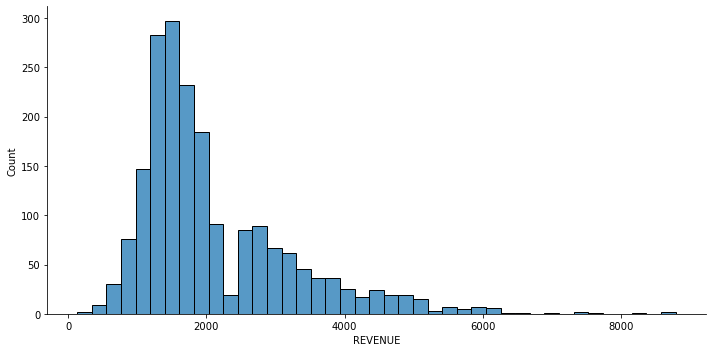

In [3]:
# developing a histogram using DISPLOT
sns.displot(data   = data_df,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

# Feature Engineering

In [4]:
data_df['log_REVENUE'] = np.log10(data_df['REVENUE'])

## Missing Value Analysis and Imputation

In [5]:
data_df.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

In [6]:
# creating a dropped dataset to visualize 'FAMILY_NAME'
df_dropped = data_df.dropna()

#check if there is any missing values in the dropped dataset
df_dropped.isnull().sum()

REVENUE                        0
CROSS_SELL_SUCCESS             0
NAME                           0
EMAIL                          0
FIRST_NAME                     0
FAMILY_NAME                    0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
MOBILE_NUMBER                  0
CANCELLATIONS_BEFORE_NOON      0
CANCELLATIONS_AFTER_NOON       0
TASTES_AND_PREFERENCES         0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
EARLY_DELIVERIES               0
LATE_DELIVERIES                0
PACKAGE_LOCKER                 0
REFRIGERATED_LOCKER            0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
MASTER_CLASSES_ATTENDED        0
MEDIAN_MEAL_RATING             0
AVG_CLICKS_PER_VISIT           0
TOTAL_PHOTOS_VIEWED            0
log_REVENUE                    0
dtype: int64

In [7]:
# creating an imputation value
fill = 'Unknown'

# imputing 'FAMILY_NAME'
data_df['FAMILY_NAME'] = data_df['FAMILY_NAME'].fillna(fill)

## Continuous Variables: Trend Based Features

Text(0, 0.5, 'REVENUE')

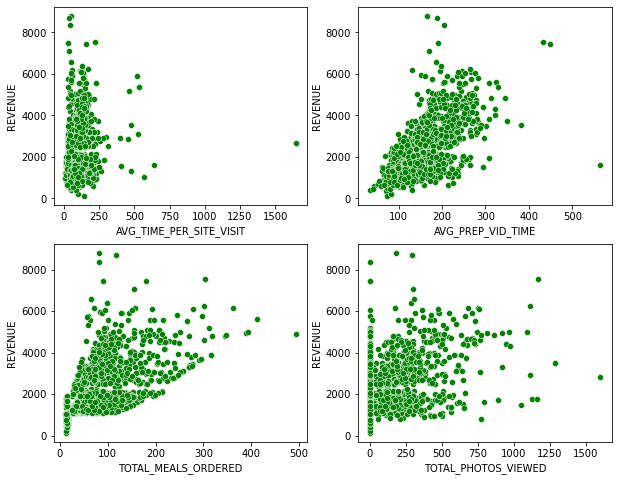

In [8]:
# Continuous Variables Visual EDA (Scatterplots)

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# AVG_TIME_PER_SITE_VISIT
plt.subplot(2, 2, 1)
sns.scatterplot(x = data_df['AVG_TIME_PER_SITE_VISIT'],
                y = data_df['REVENUE'],
                color = 'g')
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')



# AVG_PREP_VID_TIME
plt.subplot(2, 2, 2)
sns.scatterplot(x = data_df['AVG_PREP_VID_TIME'],
                y = data_df['REVENUE'],
                color = 'g')
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


# TOTAL_MEALS_ORDERED
plt.subplot(2, 2, 3)
sns.scatterplot(x = data_df['TOTAL_MEALS_ORDERED'],
                y = data_df['REVENUE'],
                color = 'g')
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


# TOTAL_PHOTOS_VIEWED
plt.subplot(2, 2, 4)
sns.scatterplot(x = data_df['TOTAL_PHOTOS_VIEWED'],
                y = data_df['REVENUE'],
                color = 'g')
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')



In [9]:
# counting the number of zeroes
AVG_TIME_PER_SITE_VISIT_zeroes   = len(data_df['AVG_TIME_PER_SITE_VISIT'][data_df['AVG_TIME_PER_SITE_VISIT'] == 0])
AVG_PREP_VID_TIME_zeroes     = len(data_df['AVG_PREP_VID_TIME'][data_df['AVG_PREP_VID_TIME'] == 0])
TOTAL_MEALS_ORDERED_zeroes = len(data_df['TOTAL_MEALS_ORDERED'][data_df['TOTAL_MEALS_ORDERED'] == 0])
TOTAL_PHOTOS_VIEWED_zeroes   = len(data_df['TOTAL_PHOTOS_VIEWED'][data_df['TOTAL_PHOTOS_VIEWED'] == 0])

# printing a table of the results
print(f"""
                             No\t\tYes
                           ---------------------
AVG_TIME_PER_SITE_VISIT   | {AVG_TIME_PER_SITE_VISIT_zeroes}\t\t{len(data_df) - AVG_TIME_PER_SITE_VISIT_zeroes}
AVG_PREP_VID_TIME         | {AVG_PREP_VID_TIME_zeroes}\t\t{len(data_df) - AVG_PREP_VID_TIME_zeroes}
TOTAL_MEALS_ORDERED       | {TOTAL_MEALS_ORDERED_zeroes}\t\t{len(data_df) - TOTAL_MEALS_ORDERED_zeroes}
TOTAL_PHOTOS_VIEWED       | {TOTAL_PHOTOS_VIEWED_zeroes}\t{len(data_df) - TOTAL_PHOTOS_VIEWED_zeroes}
""")



                             No		Yes
                           ---------------------
AVG_TIME_PER_SITE_VISIT   | 0		1946
AVG_PREP_VID_TIME         | 0		1946
TOTAL_MEALS_ORDERED       | 0		1946
TOTAL_PHOTOS_VIEWED       | 1140	806



In [10]:
# Log transformation on the continuos variables
data_df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(data_df['AVG_TIME_PER_SITE_VISIT'])
data_df['log_AVG_PREP_VID_TIME'] = np.log10(data_df['AVG_PREP_VID_TIME'])
data_df['log_TOTAL_MEALS_ORDERED'] = np.log10(data_df['TOTAL_MEALS_ORDERED'])

In [11]:
# dummy variable for the 2 features
data_df['has_TOTAL_PHOTOS_VIEWED'] = 0
data_df['has_WEEKLY_PLAN'] = 0


for index, value in data_df.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if data_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        data_df.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1


    # Second_Flr_SF
    if data_df.loc[index, 'WEEKLY_PLAN'] > 0:
        data_df.loc[index, 'has_WEEKLY_PLAN'] = 1
        
        
# checking results
data_df['has_TOTAL_PHOTOS_VIEWED'].value_counts(normalize = False).sort_index()
data_df['has_WEEKLY_PLAN'].value_counts(normalize = False).sort_index()

data_df[['has_TOTAL_PHOTOS_VIEWED', 'has_WEEKLY_PLAN']].head(10)


,has_TOTAL_PHOTOS_VIEWED,has_WEEKLY_PLAN
0,0,0
1,1,1
2,0,1
3,0,1
4,1,1
5,0,0
6,1,1
7,0,1
8,0,1
9,1,1


## Interval / Count Variables

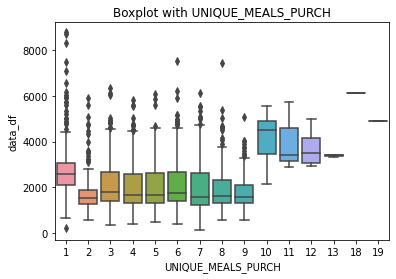

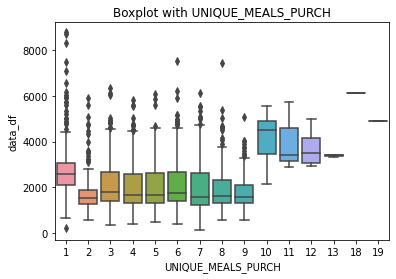

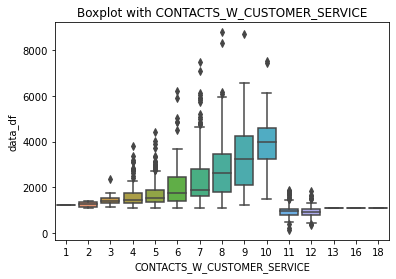

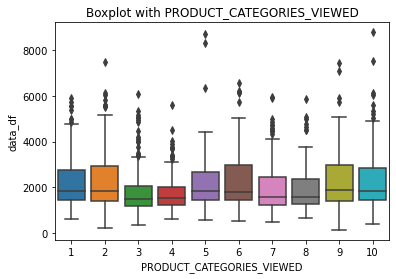

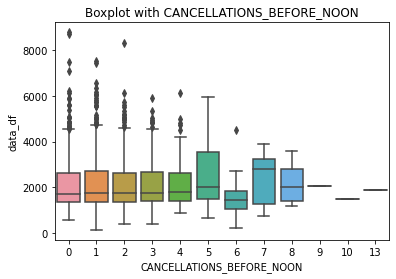

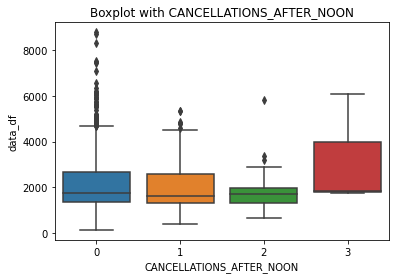

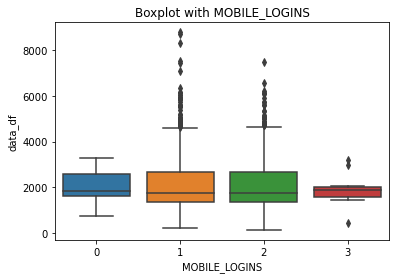

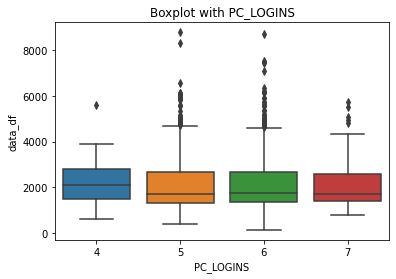

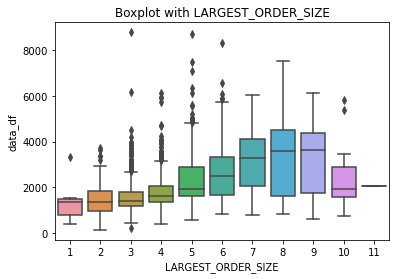

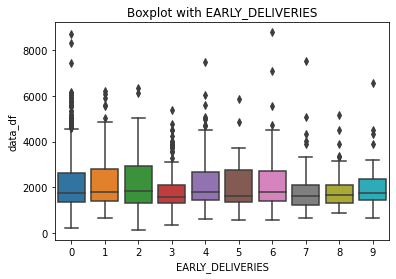

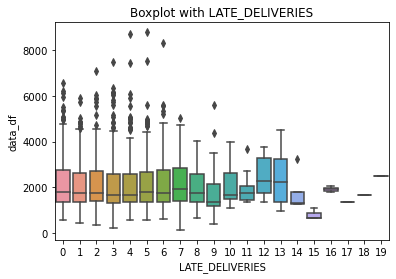

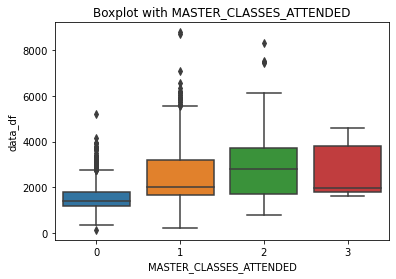

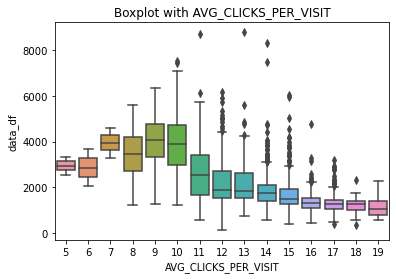

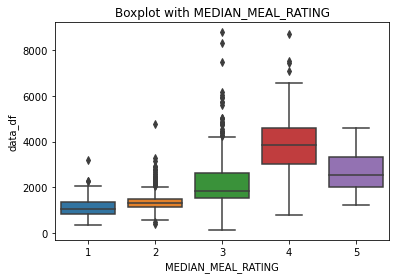

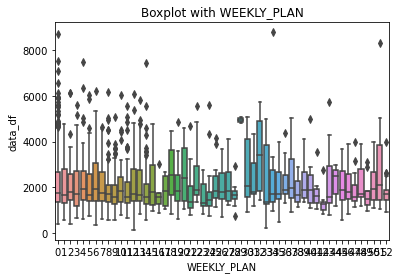

In [12]:
# UNIQUE_MEALS_PURCH
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with UNIQUE_MEALS_PURCH')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'data_df')
plt.show()



# UNIQUE_MEALS_PURCH
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with UNIQUE_MEALS_PURCH')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'data_df')
plt.show()


# CONTACTS_W_CUSTOMER_SERVICE
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with CONTACTS_W_CUSTOMER_SERVICE')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'data_df')
plt.show()


# PRODUCT_CATEGORIES_VIEWED
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with PRODUCT_CATEGORIES_VIEWED')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'data_df')
plt.show()



# CANCELLATIONS_BEFORE_NOON
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with CANCELLATIONS_BEFORE_NOON')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'data_df')
plt.show()



# CANCELLATIONS_AFTER_NOON
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with CANCELLATIONS_AFTER_NOON')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'data_df')
plt.show()




# MOBILE_LOGINS
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with MOBILE_LOGINS')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'data_df')
plt.show()


# PC_LOGINS
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with PC_LOGINS')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'data_df')
plt.show()


# LARGEST_ORDER_SIZE
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with LARGEST_ORDER_SIZE')
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'data_df')
plt.show()


# EARLY_DELIVERIES
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with EARLY_DELIVERIES')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'data_df')
plt.show()


# LATE_DELIVERIES
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with LATE_DELIVERIES')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'data_df')
plt.show()



# MASTER_CLASSES_ATTENDED
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with MASTER_CLASSES_ATTENDED')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'data_df')
plt.show()



# AVG_CLICKS_PER_VISIT
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with AVG_CLICKS_PER_VISIT')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'data_df')
plt.show()


# MEDIAN_MEAL_RATING
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with MEDIAN_MEAL_RATING')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'data_df')
plt.show()



# WEEKLY PLAN
sns.boxplot(x    = 'WEEKLY_PLAN',
            y    = 'REVENUE',
            data = data_df)
plt.title(label   = 'Boxplot with WEEKLY_PLAN')
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'data_df')
plt.show()

In [13]:
data_df['log_UNIQUE_MEALS_PURCH'] = np.log10(data_df['UNIQUE_MEALS_PURCH'])+ 0.01
data_df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(data_df['CONTACTS_W_CUSTOMER_SERVICE']) + 0.01
data_df['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(data_df['PRODUCT_CATEGORIES_VIEWED'])+ 0.01
data_df['log_LARGEST_ORDER_SIZE'] = np.log10(data_df['LARGEST_ORDER_SIZE']) + 0.01
data_df['log_AVG_CLICKS_PER_VISIT'] = np.log10(data_df['AVG_CLICKS_PER_VISIT']) + 0.01
data_df['log_MEDIAN_MEAL_RATING'] = np.log10(data_df['MEDIAN_MEAL_RATING'])+ 0.01

In [14]:
# Counting the number of zeroes for specific variables
CANCELLATIONS_BEFORE_NOON_zeroes = len(data_df['CANCELLATIONS_BEFORE_NOON'][data_df['CANCELLATIONS_BEFORE_NOON'] == 0])
CANCELLATIONS_AFTER_NOON_zeroes  = len(data_df['CANCELLATIONS_AFTER_NOON'][data_df['CANCELLATIONS_AFTER_NOON'] == 0])
WEEKLY_PLAN_zeroes               = len(data_df['WEEKLY_PLAN'][data_df['WEEKLY_PLAN'] == 0])
MASTER_CLASSES_ATTENDED_zeroes     = len(data_df['MASTER_CLASSES_ATTENDED'][data_df['MASTER_CLASSES_ATTENDED'] == 0])
EARLY_DELIVERIES_zeroes           = len(data_df['EARLY_DELIVERIES'][data_df['EARLY_DELIVERIES'] == 0])
LATE_DELIVERIES_zeroes           = len(data_df['LATE_DELIVERIES'][data_df['LATE_DELIVERIES'] == 0])

# Printing a table of the results
print(f"""
                                No\t\tYes
                             -----------------------
CANCELLATIONS_BEFORE_NOON  | {CANCELLATIONS_BEFORE_NOON_zeroes}\t\t{len(data_df) - CANCELLATIONS_BEFORE_NOON_zeroes }
CANCELLATIONS_AFTER_NOON   | {CANCELLATIONS_AFTER_NOON_zeroes}\t\t{len(data_df) - CANCELLATIONS_AFTER_NOON_zeroes}
WEEKLY_PLAN                | {WEEKLY_PLAN_zeroes}\t\t{len(data_df) - WEEKLY_PLAN_zeroes }
MASTER_CLASSES_ATTENDED    | {MASTER_CLASSES_ATTENDED_zeroes}\t\t{len(data_df) - MASTER_CLASSES_ATTENDED_zeroes }
EARLY_DELIVERIES           | {EARLY_DELIVERIES_zeroes}\t\t{len(data_df) - EARLY_DELIVERIES_zeroes }
LATE_DELIVERIES            | {LATE_DELIVERIES_zeroes}\t\t{len(data_df) - LATE_DELIVERIES_zeroes }
""")


                                No		Yes
                             -----------------------
CANCELLATIONS_BEFORE_NOON  | 667		1279
CANCELLATIONS_AFTER_NOON   | 1667		279
WEEKLY_PLAN                | 468		1478
MASTER_CLASSES_ATTENDED    | 932		1014
EARLY_DELIVERIES           | 1167		779
LATE_DELIVERIES            | 319		1627



In [15]:
# Creating new columns for dummy variable
data_df['has_CANCELLATIONS_BEFORE_NOON']        = 0
data_df['has_CANCELLATIONS_AFTER_NOON']         = 0
data_df['has_WEEKLY_PLAN']                      = 0
data_df['has_MASTER_CLASSES_ATTENDED']      = 0
data_df['has_EARLY_DELIVERIES']            = 0
data_df['has_LATE_DELIVERIES']             = 0

# for loop to declare 0 and 1 
for index, value in data_df.iterrows():
    
    # cancellations_before_noon
    if data_df.loc[index,'CANCELLATIONS_BEFORE_NOON'] > 0:
        data_df.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1

    # cancellations_after_noon
    if data_df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        data_df.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1
        
    # weekly_plan
    if data_df.loc[index,'WEEKLY_PLAN'] > 0:
        data_df.loc[index, 'has_WEEKLY_PLAN'] = 1

    # master_classes_attended
    if data_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        data_df.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1
        
    # early_deliveries
    if data_df.loc[index, 'EARLY_DELIVERIES'] > 0:
        data_df.loc[index, 'has_EARLY_DELIVERIES'] = 1
    
    # late_deliveries
    if data_df.loc[index, 'LATE_DELIVERIES'] > 0:
        data_df.loc[index, 'has_LATE_DELIVERIES'] = 1


## Categorial Data

In [16]:
# Splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in data_df.iterrows():
    
    # splitting email domain at '@'
    split_email = data_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
emails = pd.DataFrame(placeholder_lst)

In [17]:
# renaming column to concatenate
emails.columns = ['0' , 'EMAIL_domain']


# concatenating personal_email_domain with friends DataFrame
data_df = pd.concat([data_df, emails['EMAIL_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
data_df.loc[: ,'EMAIL_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
cocacola.com         28
mcdonalds.com        28
merck.com            28
apple.com            27
nike.com             27
ibm.com              26
dupont.com           26
ge.org               26
microsoft.com        25
chevron.com          25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
mmm.com              22
pg.com               22
verizon.com          22
caterpillar.com      22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_domain, dtype: int64

In [18]:
#Creating domain types 

# email domain types
professional_emails = ['@amex.com','@jnj.com', '@merck.com', '@cocacola.com','@mcdonalds.com', '@apple.com',
                              '@nike.com','@ge.org','@dupont.com','@ibm.com','@chevron.com','@microsoft.com','@exxon.com','@unitedhealth.com',
                              '@travelers.com','@boeing.com','@mmm.com','@caterpillar.com','@verizon.com','@pg.com',
                              '@walmart.com','@disney.com','@pfizer.com','@visa.com','@jpmorgan.com','@cisco.com',
                              '@unitedtech.com','@goldmansacs.com','@homedepot.com','@intel.com', '@me.com', '@aol.com', '@hotmail.com', 
                       '@live.com', '@msn.com', '@passport.com']

personal_emails  = ['@gmail.com', '@yahoo.com', '@protonmail.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in data_df['EMAIL_domain']:
    
    if '@' + domain in professional_emails:
        placeholder_lst.append('professional')
        

    elif '@' + domain in personal_emails:
        placeholder_lst.append('personal')
    
    else:
            print('Unknown')


# concatenating with original DataFrame
data_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
data_df['domain_group'].value_counts()

professional    1085
personal         861
Name: domain_group, dtype: int64

In [19]:
# one hot encoding for email domain categorial variable
one_hot_domain       = pd.get_dummies(data_df['domain_group'])


# dropping categorical variables after they've been encoded
data_df = data_df.drop('EMAIL', axis = 1)
data_df = data_df.drop('domain_group', axis = 1)
data_df = data_df.drop('EMAIL_domain', axis = 1)

# joining codings together
data_df = data_df.join([one_hot_domain])


# saving new columns
new_columns = data_df.columns

# BASE MODEL: Elimination Process

After doing all the transformations, I decided to put everything on my model and do an elimination process. Of course (I will only pick one if I did a Variable X and log_X).

In [20]:
# Building a Full Model for elimination

lm_full = smf.ols(formula = """ log_REVENUE ~                        
AVG_TIME_PER_SITE_VISIT +
AVG_PREP_VID_TIME +
TOTAL_MEALS_ORDERED +
TOTAL_PHOTOS_VIEWED + 
WEEKLY_PLAN +  
UNIQUE_MEALS_PURCH +  
CONTACTS_W_CUSTOMER_SERVICE +  
PRODUCT_CATEGORIES_VIEWED + 
CANCELLATIONS_BEFORE_NOON +  
CANCELLATIONS_AFTER_NOON +  
MOBILE_LOGINS  + 
PC_LOGINS  + 
LARGEST_ORDER_SIZE +  
EARLY_DELIVERIES +  
LATE_DELIVERIES  + 
MASTER_CLASSES_ATTENDED +
AVG_CLICKS_PER_VISIT  + 
MEDIAN_MEAL_RATING +
CROSS_SELL_SUCCESS  + 
MOBILE_NUMBER  + 
TASTES_AND_PREFERENCES +  
PACKAGE_LOCKER +  
REFRIGERATED_LOCKER +  
log_AVG_TIME_PER_SITE_VISIT +  
log_AVG_PREP_VID_TIME +  
log_TOTAL_MEALS_ORDERED +  
has_TOTAL_PHOTOS_VIEWED +  
has_WEEKLY_PLAN  + 
log_UNIQUE_MEALS_PURCH +  
log_CONTACTS_W_CUSTOMER_SERVICE +  
log_PRODUCT_CATEGORIES_VIEWED +  
has_CANCELLATIONS_BEFORE_NOON +  
has_CANCELLATIONS_AFTER_NOON +  
MOBILE_LOGINS +  
PC_LOGINS +  
log_LARGEST_ORDER_SIZE +  
has_EARLY_DELIVERIES  + 
has_LATE_DELIVERIES  + 
has_MASTER_CLASSES_ATTENDED  + 
log_AVG_CLICKS_PER_VISIT  + 
log_MEDIAN_MEAL_RATING  + 
personal   +
professional  
""",
data = data_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     167.2
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:24:24   Log-Likelihood:                 1725.4
No. Observations:                1946   AIC:                            -3369.
Df Residuals:                    1905   BIC:                            -3140.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.2602      0.154      8.175      0.000       0.958       1.563
AVG_TIME_PER_SITE_VISIT         -1.442e-06   6.29e-05     -0.023      0.982      -0.000       0.000
AVG_PREP_VID_TIME                   0.0006      0.000      2.437      0.015       0.000       0.001
TOTAL_MEALS_ORDERED                -0.0009      0.000     -7.481      0.000      -0.001      -0.001
TOTAL_PHOTOS_VIEWED              6.448e-05   1.93e-05      3.334      0.001    2.66e-05       0.000
WEEKLY_PLAN                         0.0002      0.000      0.853      0.394      -0.000       0.001
UNIQUE_MEALS_PURCH                  0.0541      0.003     18.359      0.000       0.048       0.060
CONTACTS_W_CUSTOMER_SERVICE         0.0030      0.006      0.528      0.598      -0.008       0.014
PRODUCT_CATEGORIES_VIEWED           0.0101      0.003      3.820      0.000       0.005       0.015
CANCELLATIONS_BEFORE_NOON        7.174e-06      0.002      0.004      0.997      -0.004       0.004
CANCELLATIONS_AFTER_NOON            0.0122      0.016      0.788      0.431      -0.018       0.043
MOBILE_LOGINS                      -0.0053      0.004     -1.202      0.230      -0.014       0.003
PC_LOGINS                          -0.0019      0.004     -0.473      0.636      -0.010       0.006
LARGEST_ORDER_SIZE                 -0.0240      0.007     -3.531      0.000      -0.037      -0.011
EARLY_DELIVERIES                   -0.0013      0.002     -0.807      0.420      -0.004       0.002
LATE_DELIVERIES                    -0.0003      0.001     -0.275      0.784      -0.002       0.002
MASTER_CLASSES_ATTENDED             0.0106      0.009      1.226      0.220      -0.006       0.028
AVG_CLICKS_PER_VISIT                0.0145      0.009      1.665      0.096      -0.003       0.032
MEDIAN_MEAL_RATING                  0.1235      0.019      6.372      0.000       0.085       0.162
CROSS_SELL_SUCCESS                 -0.0146      0.005     -2.879      0.004      -0.025      -0.005
MOBILE_NUMBER                       0.0062      0.007      0.879      0.379      -0.008       0.020
TASTES_AND_PREFERENCES              0.0085      0.005      1.654      0.098      -0.002       0.019
PACKAGE_LOCKER                     -0.0071      0.005     -1.295      0.196      -0.018       0.004
REFRIGERATED_LOCKER                -0.0078      0.008     -0.933      0.351      -0.024       0.009
log_AVG_TIME_PER_SITE_VISIT         0.0190      0.019      0.989      0.323      -0.019       0.057
log_AVG_PREP_VID_TIME               0.3519      0.090      3.907      0.000       0.175       0.528
log_TOTAL_MEALS_ORDERED             0.4138      0.025     16.890      0.000       0.366       0.462
has_TOTAL_PHOTOS_VIEWED             0.0185      0.007      2.704      0.007       0

## Building a Model with selected features that has good pvalues

In [21]:
lm_full = smf.ols(formula = """ log_REVENUE ~                        
TOTAL_PHOTOS_VIEWED +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
has_WEEKLY_PLAN +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
LARGEST_ORDER_SIZE +
MEDIAN_MEAL_RATING +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
has_CANCELLATIONS_AFTER_NOON +
has_MASTER_CLASSES_ATTENDED +
TASTES_AND_PREFERENCES +
CROSS_SELL_SUCCESS""",
data = data_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     444.6
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:24:24   Log-Likelihood:                 1661.4
No. Observations:                1946   AIC:                            -3293.
Df Residuals:                    1931   BIC:                            -3209.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4430      0.060     23.888      0.000       1.325       1.562
TOTAL_PHOTOS_VIEWED              9.462e-05   1.47e-05      6.450      0.000    6.58e-05       0.000
log_AVG_PREP_VID_TIME               0.5800      0.034     17.101      0.000       0.513       0.646
log_TOTAL_MEALS_ORDERED             0.2623      0.010     25.378      0.000       0.242       0.283
has_WEEKLY_PLAN                    -0.0123      0.005     -2.245      0.025      -0.023      -0.002
UNIQUE_MEALS_PURCH                  0.0481      0.003     16.872      0.000       0.042       0.054
PRODUCT_CATEGORIES_VIEWED           0.0015      0.001      1.989      0.047    2.12e-05       0.003
LARGEST_ORDER_SIZE                 -0.0155      0.003     -6.018      0.000      -0.020      -0.010
MEDIAN_MEAL_RATING                  0.0644      0.004     16.061      0.000       0.057       0.072
log_UNIQUE_MEALS_PURCH             -0.5824      0.026    -22.211      0.000      -0.634      -0.531
log_CONTACTS_W_CUSTOMER_SERVICE     0.1296      0.017      7.538      0.000       0.096       0.163
has_CANCELLATIONS_AFTER_NOON       -0.0113      0.007     -1.685      0.092      -0.025       0.002
has_MASTER_CLASSES_ATTENDED         0.0358      0.006      6.479      0.000       0.025       0.047
TASTES_AND_PREFERENCES              0.0107      0.005      2.040      0.042       0.000       0.021
CROSS_SELL_SUCCESS                 -0.0122      0.005     -2.409      0.016      -0.022      -0.002
==============================================================================
Omnibus:                      363.426   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2122.443
Skew:                          -0.745   Prob(JB):                         0.00
Kurtosis:                       7.895   Cond. No.                     6.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Preparing Explanatory Data

In [22]:
# preparing explanatory variable data
model_data   = data_df.drop([
    'NAME',
    'FIRST_NAME',
    'FAMILY_NAME'], axis = 1)


# preparing response variable data
data_df_target = data_df.loc[ : , 'REVENUE']
log_data_df_target = data_df.loc[ : , 'log_REVENUE'] # ready for use later


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
           model_data,
            data_df_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}

Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 43)
y-side: (1459,)

Testing Data
------------
X-side: (487, 43)
y-side: (487,)



# Ordinary Least Squares Regression

In [23]:
# declaring set of x-variables
x_variables = [
'TOTAL_PHOTOS_VIEWED',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'has_WEEKLY_PLAN',
'UNIQUE_MEALS_PURCH',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'MEDIAN_MEAL_RATING',
'log_UNIQUE_MEALS_PURCH',
'log_CONTACTS_W_CUSTOMER_SERVICE',
'has_CANCELLATIONS_AFTER_NOON',
'has_MASTER_CLASSES_ATTENDED',
'TASTES_AND_PREFERENCES',
'CROSS_SELL_SUCCESS'
]

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

TOTAL_PHOTOS_VIEWED +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
has_WEEKLY_PLAN +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
LARGEST_ORDER_SIZE +
MEDIAN_MEAL_RATING +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
has_CANCELLATIONS_AFTER_NOON +
has_MASTER_CLASSES_ATTENDED +
TASTES_AND_PREFERENCES +
CROSS_SELL_SUCCESS +


In [24]:
# merging X_train and y_train so that they can be used in statsmodels
data_df_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ 
TOTAL_PHOTOS_VIEWED +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
has_WEEKLY_PLAN +
UNIQUE_MEALS_PURCH +
PRODUCT_CATEGORIES_VIEWED +
LARGEST_ORDER_SIZE +
MEDIAN_MEAL_RATING +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
has_CANCELLATIONS_AFTER_NOON +
has_MASTER_CLASSES_ATTENDED +
TASTES_AND_PREFERENCES +
CROSS_SELL_SUCCESS""", data = data_df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     333.2
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:24:33   Log-Likelihood:                 1263.8
No. Observations:                1459   AIC:                            -2498.
Df Residuals:                    1444   BIC:                            -2418.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [25]:
# Applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = data_df.loc[ : , x_variables]


# Preparing the target variable
data_df_target = data_df.loc[ : , 'log_REVENUE']



x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            model_data,     # x-variables
            data_df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            data_df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [26]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) 
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)  


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7636
OLS Testing Score  : 0.7584
OLS Train-Test Gap : 0.0052


In [27]:
# zipping each feature name to its coefficient
lr_model_values = zip(model_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.51)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.56)
('log_TOTAL_MEALS_ORDERED', 0.26)
('has_WEEKLY_PLAN', -0.01)
('UNIQUE_MEALS_PURCH', 0.05)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('LARGEST_ORDER_SIZE', -0.02)
('MEDIAN_MEAL_RATING', 0.06)
('log_UNIQUE_MEALS_PURCH', -0.59)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.1)
('has_CANCELLATIONS_AFTER_NOON', -0.01)
('has_MASTER_CLASSES_ATTENDED', 0.04)
('TASTES_AND_PREFERENCES', 0.01)
('CROSS_SELL_SUCCESS', -0.02)


# ARD

In [28]:
import sklearn.linear_model # linear models

In [29]:
# Preparing set of x variables for the model
x_var_ard = [
'TOTAL_PHOTOS_VIEWED',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'has_WEEKLY_PLAN',
'UNIQUE_MEALS_PURCH',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'MEDIAN_MEAL_RATING',
'log_UNIQUE_MEALS_PURCH',
'log_CONTACTS_W_CUSTOMER_SERVICE',
'has_CANCELLATIONS_AFTER_NOON',
'has_MASTER_CLASSES_ATTENDED',
'TASTES_AND_PREFERENCES',
'CROSS_SELL_SUCCESS'
]

# preparing explanatory variable data
ard_data = model_data[x_var_ard]

# preparing response variables
log_dataset_target = model_data.loc[ : , 'log_REVENUE']


# FULL X-dataset (log Y)
x_train_ard, x_test_ard, y_train_ard, y_test_ard = train_test_split(
            ard_data ,            # x-variables
            log_dataset_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [30]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_ard, y_train_ard)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_ard)


print('Training Score:', ard_model.score(x_train_ard, y_train_ard).round(4))
print('Testing Score :',  ard_model.score(x_test_ard, y_test_ard).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_ard, y_train_ard).round(4)
ard_test_score  = ard_model.score(x_test_ard, y_test_ard).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7571
Testing Score : 0.7525
ARD Train-Test Gap : 0.0046


In [31]:
# zipping each feature name to its coefficient
ard_model_values = zip(ard_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.46)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.57953)
('log_TOTAL_MEALS_ORDERED', 0.26658)
('has_WEEKLY_PLAN', -0.01014)
('UNIQUE_MEALS_PURCH', 0.04739)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('LARGEST_ORDER_SIZE', -0.01428)
('MEDIAN_MEAL_RATING', 0.06739)
('log_UNIQUE_MEALS_PURCH', -0.5862)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.11894)
('has_CANCELLATIONS_AFTER_NOON', 0.0)
('has_MASTER_CLASSES_ATTENDED', 0.04085)
('TASTES_AND_PREFERENCES', 0.0)
('CROSS_SELL_SUCCESS', -0.01267)


# LASSO

In [32]:
# Preparing set of x variables for the model
x_var_lasso = [
'TOTAL_PHOTOS_VIEWED',
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'has_WEEKLY_PLAN',
'UNIQUE_MEALS_PURCH',
'PRODUCT_CATEGORIES_VIEWED',
'LARGEST_ORDER_SIZE',
'MEDIAN_MEAL_RATING',
'log_UNIQUE_MEALS_PURCH',
'log_CONTACTS_W_CUSTOMER_SERVICE',
'has_CANCELLATIONS_AFTER_NOON',
'has_MASTER_CLASSES_ATTENDED',
'has_TOTAL_PHOTOS_VIEWED',
'WEEKLY_PLAN',
'CANCELLATIONS_BEFORE_NOON', 
'CANCELLATIONS_AFTER_NOON', 
'MASTER_CLASSES_ATTENDED', 
'personal',
'professional',
'MOBILE_NUMBER']

# Preparing explanatory variable data
lasso_data = model_data[x_var_lasso]

# Preparing response variables
data_df_target = model_data.loc[ : , 'REVENUE']


# FULL X-dataset (log Y)
x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
            lasso_data ,              # x-variables
            data_df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [33]:
# INSTANTIATING a model object 
# lasso -> which variable is signigficant (value is less than 0,05)-> Lasso shrinking coefficient, to make the model stable)
lasso_model = sklearn.linear_model.Lasso(alpha = 0.001,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_lasso, y_train_lasso)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_lasso)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_lasso, y_train_lasso).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_lasso, y_test_lasso).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_lasso, y_train_lasso).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_lasso, y_test_lasso).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.6891
Lasso Testing Score  : 0.695
Lasso Train-Test Gap : 0.0052


In [34]:
# zipping each feature name to its coefficient
lasso_model_values = zip(lasso_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -6421.77)
('TOTAL_PHOTOS_VIEWED', 0.94)
('log_AVG_PREP_VID_TIME', 2417.11)
('log_TOTAL_MEALS_ORDERED', 1187.16)
('has_WEEKLY_PLAN', -71.44)
('UNIQUE_MEALS_PURCH', 266.61)
('PRODUCT_CATEGORIES_VIEWED', 10.65)
('LARGEST_ORDER_SIZE', -43.64)
('MEDIAN_MEAL_RATING', 311.88)
('log_UNIQUE_MEALS_PURCH', -3227.39)
('log_CONTACTS_W_CUSTOMER_SERVICE', 1288.68)
('has_CANCELLATIONS_AFTER_NOON', -65.7)
('has_MASTER_CLASSES_ATTENDED', -1.99)
('has_TOTAL_PHOTOS_VIEWED', -53.64)
('WEEKLY_PLAN', 0.87)
('CANCELLATIONS_BEFORE_NOON', 0.92)
('CANCELLATIONS_AFTER_NOON', 65.78)
('MASTER_CLASSES_ATTENDED', 168.06)
('personal', 16.12)
('professional', -0.0)
('MOBILE_NUMBER', -22.33)


# KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [36]:
# Preparing set of x variables for the model
x_var_knn = [
'log_AVG_PREP_VID_TIME',
'log_TOTAL_MEALS_ORDERED',
'has_TOTAL_PHOTOS_VIEWED',
'has_WEEKLY_PLAN',
'log_UNIQUE_MEALS_PURCH',
'log_CONTACTS_W_CUSTOMER_SERVICE',
'log_LARGEST_ORDER_SIZE',
'log_AVG_CLICKS_PER_VISIT',
'log_MEDIAN_MEAL_RATING',
'has_CANCELLATIONS_AFTER_NOON',
'has_MASTER_CLASSES_ATTENDED',
'personal',
'professional',
]

# preparing explanatory variable data
data_df_knn = data_df[x_var_knn]

# preparing response variables
log_data_df_target = data_df.loc[ : , 'log_REVENUE']

# standardize knn_data
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(data_df_knn)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(data_df_knn)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-4.55,-2.30,-0.84,-1.78,-2.27,-5.60,-3.88,-5.38,-3.08,-0.41,-1.04,-0.89,-1.12
25%,-0.70,-0.55,-0.84,0.56,-0.52,-0.83,-0.89,-0.56,-0.91,-0.41,-1.04,-0.89,-1.12
50%,0.05,0.04,-0.84,0.56,0.29,0.17,-0.11,-0.12,0.36,-0.41,0.96,-0.89,0.89
75%,0.61,0.67,1.19,0.56,0.83,0.57,0.50,0.66,0.36,-0.41,0.96,1.12,0.89
max,4.29,2.94,1.19,0.56,2.42,2.97,2.64,1.96,1.96,2.44,0.96,1.12,0.89


In [37]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            log_data_df_target,
            test_size = 0.25,
            random_state = 219)

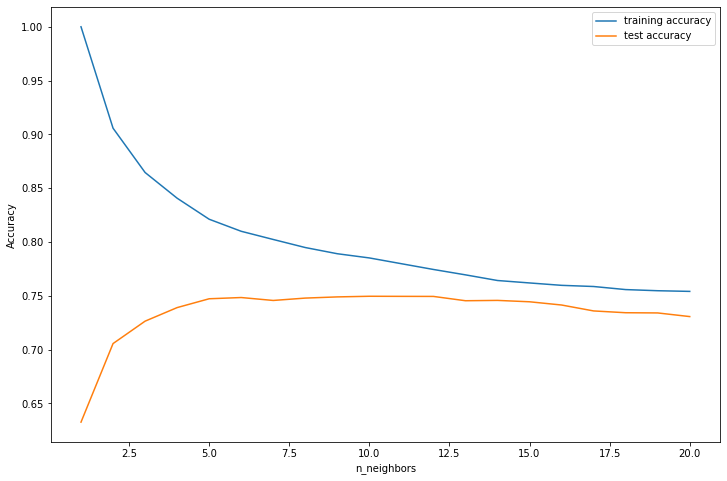

The optimal number of neighbors is 10


In [38]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy,     label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [39]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 16)


# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.7597
KNN Testing Score : 0.7415
KNN Train-Test Gap: 0.0182


# RESULTS

In [40]:
# Comparing Results
model_performance = {
    
    'Model Type'    : ['OLS', 'ARD', 'Lasso', 'KNN'],
           
    'Training' : [lr_train_score,
                  ard_train_score,  lasso_train_score,knn_stand_score_train],
           
    'Testing'  : [lr_test_score, 
                 ard_test_score, lasso_test_score,knn_stand_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, 
                        ard_test_gap, lasso_test_gap,knn_stand_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(ard_model_lst), len(lasso_model_lst), (len(x_var_knn)+1) ]}


# Cleaning up into a data frame
model_performance = pd.DataFrame(model_performance)


# creating a dictionary for candidate model performance
candidate_model_performance = {
    
    'Model Type'    : ['OLS'],
           
    'Training' : [lr_train_score],
           
    'Testing'  : [lr_test_score],
                    
    'Train-Test Gap' : [lr_test_gap],
                    
    'Model Size' : [len(lr_model_lst)]}
        
# converting candidate_model_performance into a DataFrame
candidate_model_performance = pd.DataFrame(candidate_model_performance)

# create a dataframe to display model coefficient
candidate_model = pd.DataFrame(lr_model_lst)
candidate_model.columns = ['Variables', 'Coefficients']
print(f"""
Results:

{model_performance.to_string(index=False)} 

------------------------------------------------------------------------------
------------------------------------------------------------------------------

Preferred Model: 'OLS'

{candidate_model_performance.to_string(index=False)} 

{candidate_model.to_string(index=False)} 
""")


Results:

Model Type  Training  Testing  Train-Test Gap  Model Size
       OLS    0.7636   0.7584          0.0052          15
       ARD    0.7571   0.7525          0.0046          15
     Lasso    0.6891   0.6950          0.0052          21
       KNN    0.7597   0.7415          0.0182          14 

------------------------------------------------------------------------------
------------------------------------------------------------------------------

Preferred Model: 'OLS'

Model Type  Training  Testing  Train-Test Gap  Model Size
       OLS    0.7636   0.7584          0.0052          15 

                      Variables  Coefficients
                      intercept          1.51
            TOTAL_PHOTOS_VIEWED          0.00
          log_AVG_PREP_VID_TIME          0.56
        log_TOTAL_MEALS_ORDERED          0.26
                has_WEEKLY_PLAN         -0.01
             UNIQUE_MEALS_PURCH          0.05
      PRODUCT_CATEGORIES_VIEWED          0.00
             LARGEST_ORDER_S